### Breaking into the field

In this notebook we want to determine the best way one can break into the field of Computer Sceince.
Another question of interest we want to answer is whether a Master's degree or higher is required to break into the  field

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from collections import defaultdict
%matplotlib inline

C:\Users\BronyahJ\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('./survey_results_public.csv')     # load survey results data
schema = pd.read_csv('./survey_results_schema.csv') # load survey data schema

In [3]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


In [5]:
list(schema[schema.Column=='CousinEducation']['Question']) #field of interest which best answers our question

["Let's pretend you have a distant cousin. They are 24 years old, have a college degree in a field not related to computer programming, and have been working a non-coding job for the last two years. They want your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to your cousin?\nLet's pretend you have a distant cousin named Robert. He is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. He wants your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to Robert?\nLet's pretend you have a distant cousin named Alice. She is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. She wants your advice on how to switch to a career as a software developer. Which

In [6]:
df['CousinEducation'].isnull().mean() # substantial amount of missing data but still useful insight nonetheless

0.5414072229140723

In [7]:
df_study = df['CousinEducation'].value_counts().reset_index()

In [8]:
def get_possible_values(col_name):
    
    '''
    INPUTS
    
    col_name - name of column in dataframe
    
    OUTPUTS
    
    values_list - String list of all entries in given series
    
    Description
    
    This function splits all values in all rows delimited by a semicolon and returns them as a string
    
    '''
    
    values = []
    
    column_split = df[col_name].dropna().apply(lambda x: x.split(';'))
    
    for row in column_split:
        for val in row:
            values.append(val.strip())
    
    values_list = list(set(values))
    
    return values_list

In [9]:
ed_methods=get_possible_values('CousinEducation') # get all methods of breaking into the field

In [10]:
def count_and_plot(df,col1,col2,values,plot=True):
    
    
    '''
    INPUTS
    
    df - dataframe to process
    col1 - column name for data of interest
    col2 - column name for data to be counted
    values - list of all possible values in column of interest 
    plot - boolean whether to plot data
    
    
    OUTPUTS
    
    df_perc - dataframe of computed percentages
    
    '''
    
    df_count = defaultdict(int)
    
    for val in values:
        for idx in range(df.shape[0]):
            if val in df[col1][idx]:
                df_count[val] += int(df[col2][idx])
    
    df_count = pd.DataFrame(pd.Series(df_count)).reset_index()
    df_count.columns = [col1,col2]
    df_count.sort_values(col2, ascending=False, inplace=True)
    df_count.set_index(col1, inplace=True)
    
    if plot:
        (df_count/df_count.sum()).plot(kind="bar", legend = None);
        plt.title(col2);
    
    df_perc = df_count/df_count.sum()
    
    return df_perc
    

Taking Online Courses seems to be the best way to break into the field

,CousinEducation
index,
Take online courses,0.209432
Buy books and work through the exercises,0.161408
Part-time/evening courses,0.103260
Contribute to open source,0.101968
Bootcamp,0.072476
Conferences/meet-ups,0.072036
Return to college,0.068918
Participate in online coding competitions,0.049590
Get a job as a QA tester,0.046376


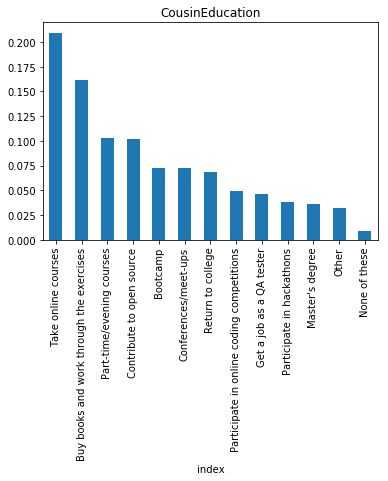

In [11]:
count_and_plot(df_study,'index','CousinEducation',ed_methods)

We want to answer the 2nd question of whether a master's degree is required to break into the field
From the above chart about 3% suggested getting a master's degree

In [19]:
list(schema[schema.Column=='FormalEducation']['Question'])

["Which of the following best describes the highest level of formal education that you've completed?"]

In [12]:
df['FormalEducation'].value_counts()/df.shape[0] # about 65% of survey participants have at least a bachelor's degree

Bachelor's degree                                                    0.420474
Master's degree                                                      0.216785
Some college/university study without earning a bachelor's degree    0.158176
Secondary school                                                     0.114960
Doctoral degree                                                      0.025451
I prefer not to answer                                               0.021579
Primary/elementary school                                            0.020373
Professional degree                                                  0.013913
I never completed any formal education                               0.008289
Name: FormalEducation, dtype: float64

In [13]:
df['FormalEducation'].isnull().mean() # no missing values in the Formal Education column

0.0

In [14]:
def high_education(ed_string):
    
    '''
    INPUTS
    
    ed_string - input string to check for substring
    
    Description
    
    This function tries to categorize each entry string based on education level
    
    '''
    
    if ed_string in ("Master's degree","Doctoral degree","Professional degree"):
        return 1
    else:
        return 0

In [15]:
# Categorizing each entry into 2 major groups
df['EducationLevel'] = df['FormalEducation'].apply(high_education)

In [16]:
high_ed = df[df['EducationLevel'] == 1]     # dataframe with only participants with higher education
not_high_ed = df[df['EducationLevel'] == 0] # dataframe with only participants without higher education

In [17]:
df_study1 = high_ed['CousinEducation'].value_counts().reset_index()
df_study0 = not_high_ed['CousinEducation'].value_counts().reset_index()

We see from the below that those with higher education suggested master's degree twice more than those without at least a master's degree

However we see that for both groups online courses are still the popular choice

In [18]:
ed_1_perc = count_and_plot(df_study1,'index','CousinEducation',ed_methods,plot=False)
ed_0_perc = count_and_plot(df_study0,'index','CousinEducation',ed_methods,plot=False)
comp_df = pd.merge(ed_1_perc, ed_0_perc, left_index=True, right_index=True)
comp_df.columns = ['ed_1_perc', 'ed_0_perc']
comp_df['Diff_HigherEd_Vals'] = comp_df['ed_1_perc'] - comp_df['ed_0_perc']
comp_df.style.bar(subset=['Diff_HigherEd_Vals'], align='mid', color=['#d65f5f', '#5fba7d'])

,ed_1_perc,ed_0_perc,Diff_HigherEd_Vals
index,,,
Take online courses,0.206234,0.210548,-0.004314
Buy books and work through the exercises,0.162959,0.160867,0.002092
Part-time/evening courses,0.101736,0.103791,-0.002055
Contribute to open source,0.100409,0.102513,-0.002104
Bootcamp,0.074762,0.071677,0.003085
Return to college,0.068975,0.068898,0.000077
Conferences/meet-ups,0.064461,0.074679,-0.010218
Master's degree,0.060532,0.027778,0.032754
Get a job as a QA tester,0.047257,0.046068,0.001190
